In [1]:
import pandas as pd

df_crash = pd.read_csv('data/Traffic_Crashes_Crashes.csv')

In [2]:
# drop 'CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
# 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I'

not_relevant_info = ['RD_NO', 'CRASH_DATE', 'CRASH_DATE_EST_I', 'LANE_CNT', 'REPORT_TYPE', 'CRASH_TYPE', \
                  'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'DATE_POLICE_NOTIFIED', 'DAMAGE', 'NUM_UNITS', \
                  'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'FIRST_CRASH_TYPE', \
                  'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'ALIGNMENT', \
                  'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', \
                  'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', \
                  'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', \
                  'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', \
                  'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'POSTED_SPEED_LIMIT'
                 ]

df_crash.drop((not_relevant_info), axis = 1, inplace = True)
df_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554228 entries, 0 to 554227
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CRASH_RECORD_ID          554228 non-null  object
 1   TRAFFIC_CONTROL_DEVICE   554228 non-null  object
 2   DEVICE_CONDITION         554228 non-null  object
 3   WEATHER_CONDITION        554228 non-null  object
 4   LIGHTING_CONDITION       554228 non-null  object
 5   TRAFFICWAY_TYPE          554228 non-null  object
 6   ROADWAY_SURFACE_COND     554228 non-null  object
 7   ROAD_DEFECT              554228 non-null  object
 8   PRIM_CONTRIBUTORY_CAUSE  554228 non-null  object
 9   SEC_CONTRIBUTORY_CAUSE   554228 non-null  object
dtypes: object(10)
memory usage: 42.3+ MB


In [3]:
relevant_device_present = ['TRAFFIC SIGNAL', 'STOP SIGN/FLASHER', 'OTHER', 'LANE USE MARKING', 'YIELD', 'OTHER REG. SIGN', \
                 'OTHER WARNING SIGN', 'RAILROAD CROSSING GATE', 'PEDESTRIAN CROSSING SIGN', 'POLICE/FLAGMAN', 'SCHOOL ZONE', \
                 'DELINEATORS', 'FLASHING CONTROL SIGNAL', 'BICYCLE CROSSING SIGN', 'NO PASSING', 'RR CROSSING SIGN']

def traffic_control_transfomer(val):
    if val in relevant_device_present:
        return 1
    else:
        return 0

df_crash['TRAFFIC_DEVICE_PRESENT'] = df_crash['TRAFFIC_CONTROL_DEVICE'].map(traffic_control_transfomer)

In [4]:
working_devices = ['FUNCTIONING PROPERLY', 'WORN REFLECTIVE MATERIAL']

def device_working(val):
    if val in working_devices:
        return 1
    else:
        return 0
    
df_crash['DEVICE_WORKING'] = df_crash['DEVICE_CONDITION'].map(device_working)

In [5]:
def device_present(val):
    if val == True:
        return 1
    else:
        return 0

In [6]:
device_list = (df_crash['TRAFFIC_DEVICE_PRESENT'] == 1) & (df_crash['DEVICE_WORKING'] == 1)
device_dataframe = pd.DataFrame(device_list, columns = ['TRAFFIC_DEVICE'], index = df_crash.index)
frames = [df_crash, device_dataframe]
df_crash = pd.concat(frames, axis = 1)

In [7]:
df_crash['TRAFFIC_DEVICE'] = df_crash['TRAFFIC_DEVICE'].map(device_present)

In [8]:
bad_weather_cond = ['RAIN', 'SNOW', 'FOG/SMOKE/HAZE', 'SLEET/HAIL', 'FREEZING RAIN/DRIZZLE', 'BLOWING SNOW', \
                   'SEVERE CROSS WIND GATE', 'BLOWING SAND, SOIL, DIRT']

def weather_condition(val):
    if val in bad_weather_cond:
        return 1
    else:
        return 0
    
df_crash['BAD_WEATHER'] = df_crash['WEATHER_CONDITION'].map(weather_condition)

In [9]:
bad_visibility = ['DARKNESS', 'DUSK', 'DAWN']

def visibility(val):
    if val in bad_visibility:
        return 1
    else:
        return 0

df_crash['BAD_VISIBILITY'] = df_crash['LIGHTING_CONDITION'].map(visibility)

In [10]:
def trafficway_danger(val):
    if val == 'NOT DIVIDED':
        return 1
    else:
        return 0
    
df_crash['BAD_TRAFFIC'] = df_crash['TRAFFICWAY_TYPE'].map(trafficway_danger)

In [11]:
bad_road_cond = ['WET', 'SNOW OR SLUSH', 'ICE', 'SAND, MUD, DIRT']

def road_cond(val):
    if val in bad_road_cond:
        return 1
    else:
        return 0
    
df_crash['BAD_ROAD_CONDITION'] = df_crash['ROADWAY_SURFACE_COND'].map(road_cond)

In [12]:
road_defect = ['RUT, HOLES', 'WORN_SURFACE']

def defect_road(val):
    if val in road_defect:
        return 1
    else:
        return 0

df_crash['DEFECT_ROAD'] = df_crash['ROAD_DEFECT'].map(defect_road)

In [13]:
driving = ['FAILING TO YIELD RIGHT-OF-WAY', 'FOLLOWING TOO CLOSELY', 'IMPROPER OVERTAKING/PASSING', 'FAILING TO REDUCE SPEED TO AVOID CRASH', \
          'IMPROPER BACKING', 'IMPROPER LANE USAGE', 'IMPROPER TURNING/NO SIGNAL', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', \
          'DISREGARDING TRAFFIC SIGNALS', 'DISREGARDING STOP SIGN', 'DISTRACTION - FROM INSIDE VEHICLE', 'DRIVING ON WRONG SIDE/WRONG WAY', \
          'DISTRACTION - FROM OUTSIDE VEHICLE', 'EXCEEDING AUTHORIZED SPEED LIMIT', 'EXCEEDING SAFE SPEED FOR CONDITIONS', \
          'DISREGARDING OTHER TRAFFIC SIGNS', 'DISREGARDING ROAD MARKINGS', 'TURNING RIGHT ON RED', 'RELATED TO BUS STOP', 'DISREGARDING YIELD SIGN', \
          'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)', 'PASSING STOPPED SCHOOL BUS']
behavior = ['PHYSICAL CONDITION OF DRIVER', 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER' \
           'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 'CELL PHONE USE OTHER THAN TEXTING', \
           'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 'TEXTING']
road = ['WEATHER', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', \
       'ROAD CONSTRUCTION/MAINTENANCE']
other = ['EQUIPMENT - VEHICLE CONDITION', 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST', 'ANIMAL', \
         'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 'OBSTRUCTED CROSSWALKS', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT']

In [14]:
# for index, row in df_crash.iterrows(): 
#     if df_crash.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE':
#         if (df_crash.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE') & (df_crash.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE'):
#             df_crash.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] = df_crash.loc[index,'SEC_CONTRIBUTORY_CAUSE']

In [15]:
def crash_cause(val):
    if val in driving:
        return 1
    elif val in behavior:
        return 2
    elif val in road:
        return 3
    else:
        return 4

df_crash['Target1'] = df_crash['PRIM_CONTRIBUTORY_CAUSE'].map(crash_cause)

In [16]:
unnecessary_traffic_columns = ['CRASH_RECORD_ID', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'TRAFFIC_DEVICE_PRESENT', 'DEVICE_WORKING', \
                              'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', \
                              'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']
df_crash.drop(unnecessary_traffic_columns, axis = 1, inplace = True)

In [17]:
df_crash['is_two'] = (df_crash['Target1'] == 4) & (df_crash['BAD_ROAD_CONDITION'] == 1)

In [18]:
df_crash

,TRAFFIC_DEVICE,BAD_WEATHER,BAD_VISIBILITY,BAD_TRAFFIC,BAD_ROAD_CONDITION,DEFECT_ROAD,Target1,is_two
0,0,0,0,0,0,0,1,False
1,1,0,0,1,0,0,1,False
2,1,0,0,0,0,0,1,False
3,0,0,1,0,0,0,4,False
4,0,0,0,0,0,0,4,False
...,...,...,...,...,...,...,...,...
554223,0,0,0,0,0,0,4,False
554224,1,0,0,1,0,0,1,False
554225,0,0,0,0,0,0,4,False
554226,0,0,0,1,0,0,4,False


In [19]:
df_crash['Target'] = df_crash['Target1'] + df_crash['is_two']

In [20]:
def two(val):
    if val == False:
        return 0
    else:
        return 1
    
df_crash['is_two'] = df_crash['is_two'].map(two)

In [21]:
df_crash['Target'] = df_crash['Target1'] + df_crash['is_two']
df_crash[df_crash['Target'] == 5]

,TRAFFIC_DEVICE,BAD_WEATHER,BAD_VISIBILITY,BAD_TRAFFIC,BAD_ROAD_CONDITION,DEFECT_ROAD,Target1,is_two,Target
24,1,1,0,1,1,0,4,1,5
31,0,0,0,0,1,0,4,1,5
45,0,0,0,0,1,0,4,1,5
61,0,1,0,0,1,0,4,1,5
63,0,1,1,1,1,0,4,1,5
...,...,...,...,...,...,...,...,...,...
554187,0,1,1,1,1,0,4,1,5
554195,0,1,0,1,1,0,4,1,5
554205,1,0,1,0,1,0,4,1,5
554210,0,1,1,1,1,0,4,1,5


In [22]:
def road(val):
    if val == 5:
        return 2
    else:
        return val

df_crash['Target'] = df_crash['Target'].map(road)

In [23]:
df_crash.drop(['Target1', 'is_two'], axis = 1)

,TRAFFIC_DEVICE,BAD_WEATHER,BAD_VISIBILITY,BAD_TRAFFIC,BAD_ROAD_CONDITION,DEFECT_ROAD,Target
0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1
2,1,0,0,0,0,0,1
3,0,0,1,0,0,0,4
4,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...
554223,0,0,0,0,0,0,4
554224,1,0,0,1,0,0,1
554225,0,0,0,0,0,0,4
554226,0,0,0,1,0,0,4


In [24]:
# df_crash['DRIVING_ERROR1'] = df_crash['PRIM_CONTRIBUTORY_CAUSE'].map(crash_driving)
# df_crash['BEHAVIOR_ERROR1'] = df_crash['PRIM_CONTRIBUTORY_CAUSE'].map(crash_behavior)
# df_crash['ROAD_EXTERNAL_CAUSE1'] = df_crash['PRIM_CONTRIBUTORY_CAUSE'].map(crash_road_other)
# df_crash['DRIVING_ERROR2'] = df_crash['SEC_CONTRIBUTORY_CAUSE'].map(crash_driving)
# df_crash['BEHAVIOR_ERROR2'] = df_crash['SEC_CONTRIBUTORY_CAUSE'].map(crash_behavior)
# df_crash['ROAD_EXTERNAL_CAUSE2'] = df_crash['SEC_CONTRIBUTORY_CAUSE'].map(crash_road_other)
# driverErrorList = ((df_crash['DRIVING_ERROR1'] == 1) | (df_crash['DRIVING_ERROR2'] == 1))
# behaviorErrorList = ((df_crash['BEHAVIOR_ERROR1'] == 1) | (df_crash['BEHAVIOR_ERROR2'] == 1))
# roadOther = ((df_crash['ROAD_EXTERNAL_CAUSE1'] == 1) | (df_crash['ROAD_EXTERNAL_CAUSE2'] == 1))
# driver_dataframe = pd.DataFrame(device_list, columns = ['DRIVING_ERROR'], index = df_crash.index)
# frames = [df_crash, driver_dataframe]
# df_crash = pd.concat(frames, axis = 1)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


dt = DecisionTreeClassifier(random_state = 1)

X = df_crash.drop('Target', axis = 1)
y = df_crash['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

dt.fit(X_train, y_train)
dt.score(X_test, y_test)

1.0

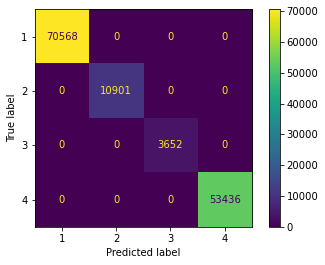

In [26]:
plot_confusion_matrix(dt, X_test, y_test)